# First Exercise

In [43]:
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [44]:
mouth_indices_interior = [13, 312, 311, 310, 415, 308, 324, 318, 402, 317, 14, 87, 178, 88, 95, 78, 191, 80, 81, 82]

In [45]:
mouth_indices = [61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 78, 95, 88, 178, 87, 14, 317, 402, 318, 324, 78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308]

In [46]:
SURFACE_MOUTH = 1000
STR_MOUTH_CLOSED = "Votre bouche est fermée !"
STR_MOUTH_OPEN = "Votre bouche est ouverte !"

In [47]:
from turtle import color


def read_json(path):
    import json
    f = open(path)
    data = json.load(f)
    f.close()
    return data

def to_numpy(data):
    data_l = []
    for d in data:
        el = [d["x"], d["y"]]
        data_l.append(el)

    data_np = np.array(data_l)
    return data_np

def read_image(path):
    with cbook.get_sample_data(path) as im_file:
	    image = plt.imread(im_file)
    return image

def extract_mouth_coordinates(shape, data, couple):
    x = data[couple, 0] * shape[1]
    y = data[couple, 1] * shape[0]
    return x, y

def prepare(paths):
    path_png, path_json = paths
    data = read_json(path_json)
    data_np = to_numpy(data)
    image = read_image(path_png)
    x, y = extract_mouth_coordinates(image.shape, data_np, mouth_indices_interior)
    return image, (x, y)

def show(image, couple, x, y):
    x, y = couple
    fig, ax = plt.subplots()
    fig.set_size_inches(25, 20)
    plt.imshow(image)
    plt.scatter(x, y, color="white", s=0.1)
    polygon1 = Polygon(list(zip(x, y)))
    ax.add_patch(polygon1)
    for i, txt in enumerate(mouth_indices_interior):
        ax.annotate(txt, (x[i], y[i]), color="white", fontsize=9)

    plt.show()

def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def mouth_clopen(x, y):
    surface = PolyArea(x, y)
    if surface <= SURFACE_MOUTH:
        print(STR_MOUTH_CLOSED)
        return False
    else:
        print(STR_MOUTH_OPEN)
        return True


In [48]:
path_png = '/home/younous/Desktop/Python/MediapipeApplication/imgs/younous.png'
path_json = '/home/younous/Desktop/Python/MediapipeApplication/output/younous.json'

path_2_png = '/home/younous/Desktop/Python/MediapipeApplication/imgs/opened_mouth.jpg'
path_2_json = '/home/younous/Desktop/Python/MediapipeApplication/output/opened_mouth.json'

7.518441098043695
Votre bouche est fermée !


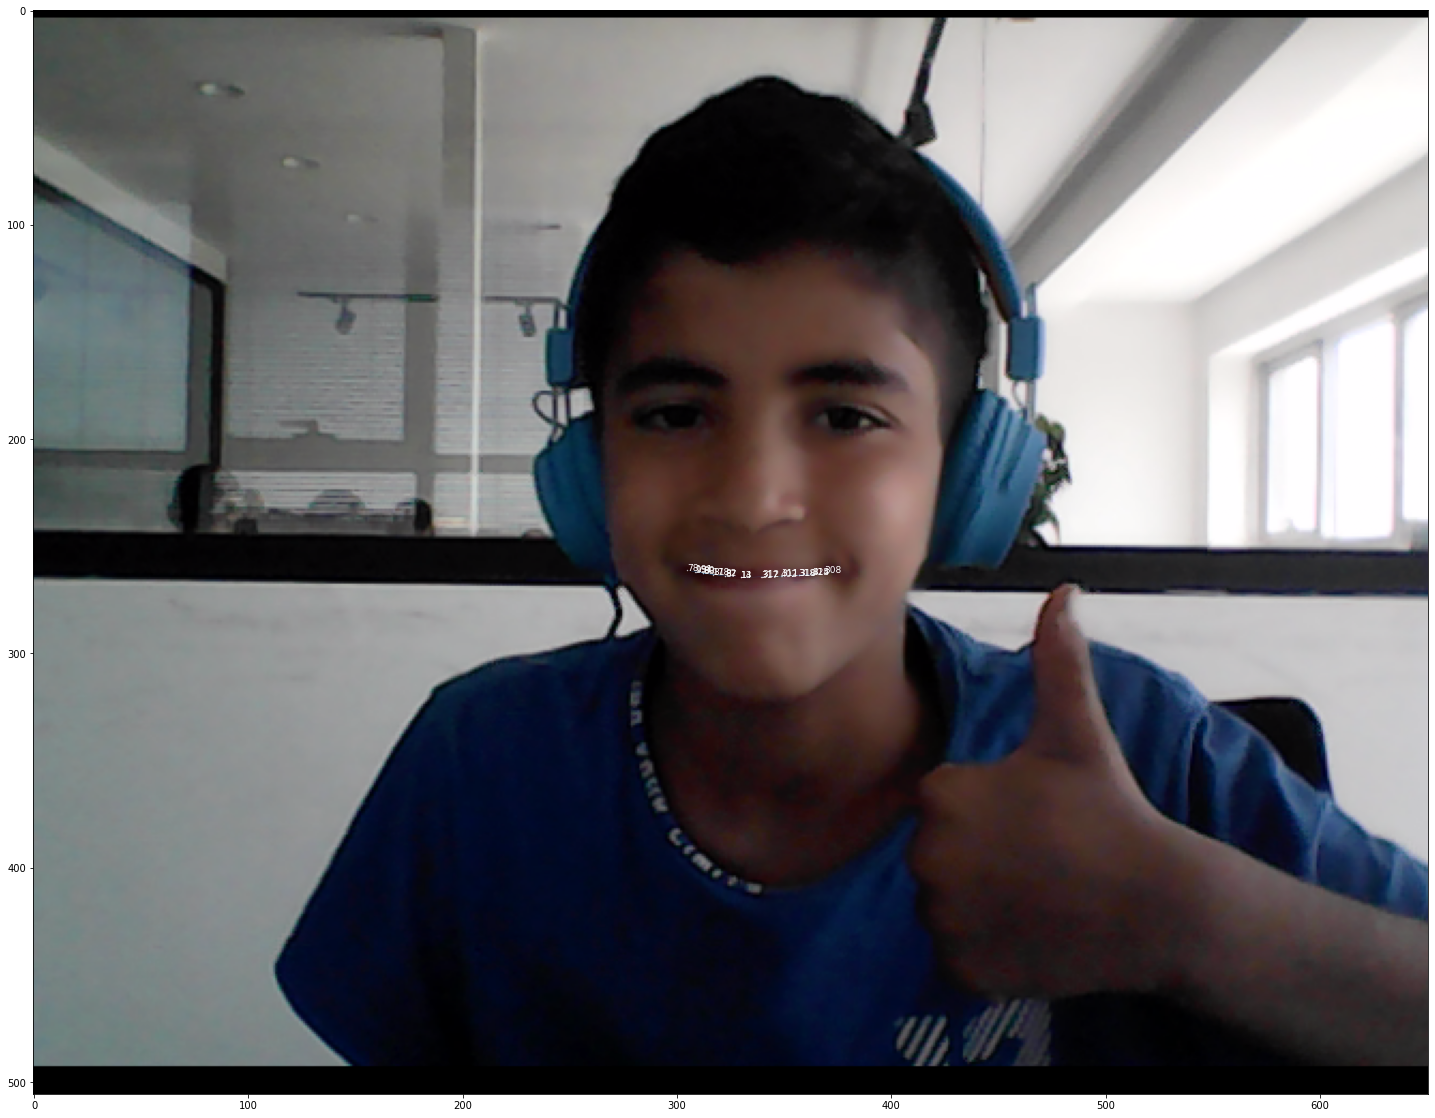

In [49]:
image, (x, y) = prepare([path_png, path_json])
print(PolyArea(x, y))
mouth_clopen(x, y)
show(image, [x, y], x, y)

5209.246644611703
Votre bouche est ouverte !


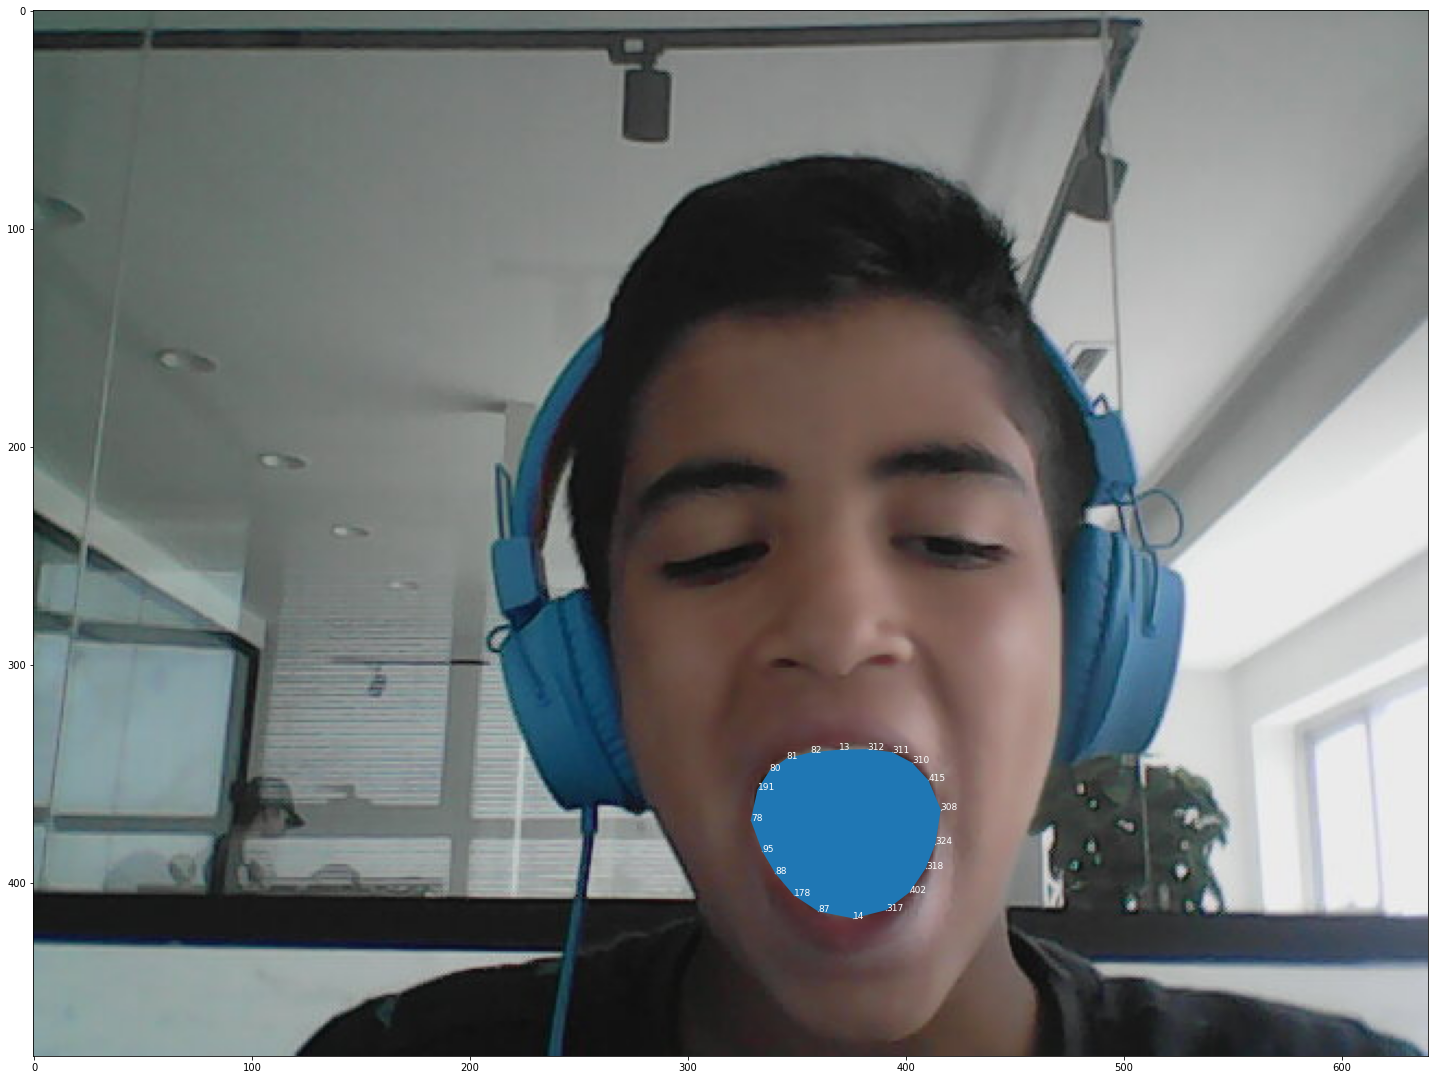

In [50]:
image, (x, y) = prepare([path_2_png, path_2_json])
print(PolyArea(x, y))
mouth_clopen(x, y)
show(image, [x, y], x, y)

In [51]:
print(x)

[369.22000885 382.24941254 393.58028412 402.74505615 410.26569366
 415.93490601 413.43647003 409.06219482 401.7035675  390.89393616
 375.70236206 359.77485657 348.44768524 339.99416351 333.96789551
 328.75198364 331.93664551 337.49500275 345.07946014 356.06693268]


In [52]:
print(y)

[339.06666756 338.79618645 340.18106461 345.0050354  353.06445122
 366.54659271 382.25535393 393.39491844 404.40021515 412.66797066
 416.44752502 413.27662468 405.79919815 395.77119827 385.57823181
 371.38998985 357.12810516 348.58097076 343.12940598 340.35887718]


In [53]:
couples = list(zip(x, y))